# Importation of needed libraries 

In [2]:
!pip install python-louvain

In [2]:

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import community as community_louvain
import networkx.algorithms.community as nxcom
from collections import Counter
import random as rm



# OPENING OF FILES

In [3]:
edge_list=[]
with open("aves-sparrow-social.edges") as file:
    lines=file.readlines()
    for line in lines:
        edges=line.split()
        edge_list.append(edges)
        
# CONVERTING Python list of list to a pandas data frame        
df=pd.DataFrame(edge_list, columns=["Source","Target","Edge_attribute","year"])

df.shape

(516, 4)

# Converting pandas series to edge list

In [12]:
G=nx.from_pandas_edgelist(df,source='Source', target='Target',edge_attr='Edge_attribute')
nx.info(G)
trust= nx.get_edge_attributes(G, 'Edge_attribute')

# Adding data metrics for the graph

In [5]:
## Degree centrality: The number of edges a node has
degree_centrality = nx.degree_centrality(G)

## Closeness_centrality: Finds the nodes with the slightest distance between them. 
#Through this way the efficiecny of nodes to transfer data is measured.
closeness_centrality = nx.closeness_centrality(G)

## Betweeness centrality: Finds shortest path.
betweenness_centrality = nx.betweenness_centrality(G)



# Ploting/ visualizing the Network of the dataset

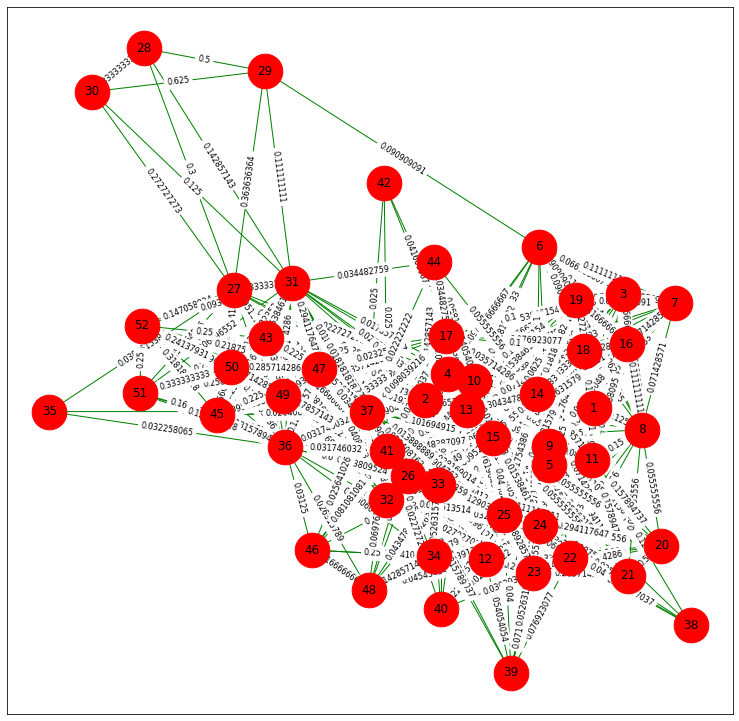

3 3 3 {('37', '35'), ('36', '35'), ('27', '35')}


In [13]:
G=G.copy()
pos=nx.spring_layout(G)
plt.figure(figsize=(13,13))
nx.draw_networkx_edge_labels(G, pos=pos,edge_labels=trust, font_size=8)
nx.draw_networkx(G, pos, with_labels=True, node_color='r', edge_color='g',node_size=1200,arrowsize=30)
plt.show()
a=nx.node_connectivity(G)
b=nx.minimum_node_cut(G)
d=nx.edge_connectivity(G)
e=nx.minimum_edge_cut(G)
print(a,d,d,e)

# Modularity using the Girvan-Newman Algorithms

the number of connected components are 2


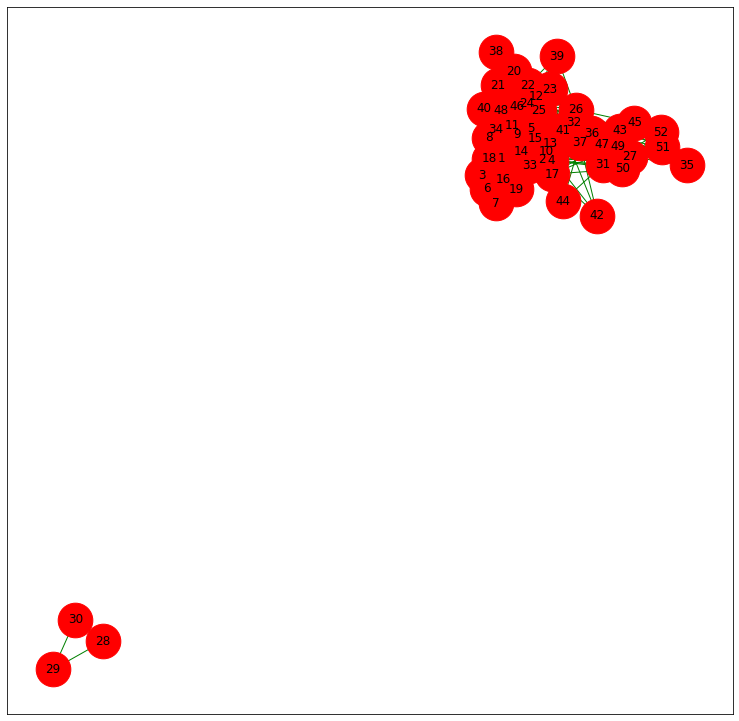

In [11]:

G1=G.copy()
## Helper function to calculate edge betweeness
def edge_to_remove(G):
    dict1=nx.edge_betweenness_centrality(G)
    list_of_tuples=list(dict1.items())
    list_of_tuples.sort(key=lambda x: x[1], reverse=True)
    return list_of_tuples[0][0] # it 
def girvan(G):
    '''
    This returns the components of a graph as sub graph 
    I.e if the graph is connected as one it eill return 1 subgraph which is the graph itself
    but id the graph has more than one components it will return the components as subgraph of the grap
   '''
    c=nx.connected_components(G)
    l=len([G.subgraph(i).copy() for i in c])
    print('the number of connected components are', l)
    while (l==1):
        G.remove_edge(*edge_to_remove(G))
        c=nx.connected_components(G)
        l=len([G.subgraph(i).copy() for i in c])
        print('the number of connected components are', l)
    return c
D=girvan(G1)
'''
Graphical representation of the distince communities according to Girvan-Newman algorithm
'''
    

trust= nx.get_edge_attributes(G1, 'C')
pos=nx.spring_layout(G1)
plt.figure(figsize=(13,13))
nx.draw_networkx_edge_labels(G1, pos=pos,edge_labels=trust, font_size=12)
nx.draw_networkx(G1, pos, with_labels=True, node_color='r', edge_color='g',node_size=1200,arrowsize=30)


plt.show()

### Modularity using the Greedy Algorithms

The dataset has 3 communities.


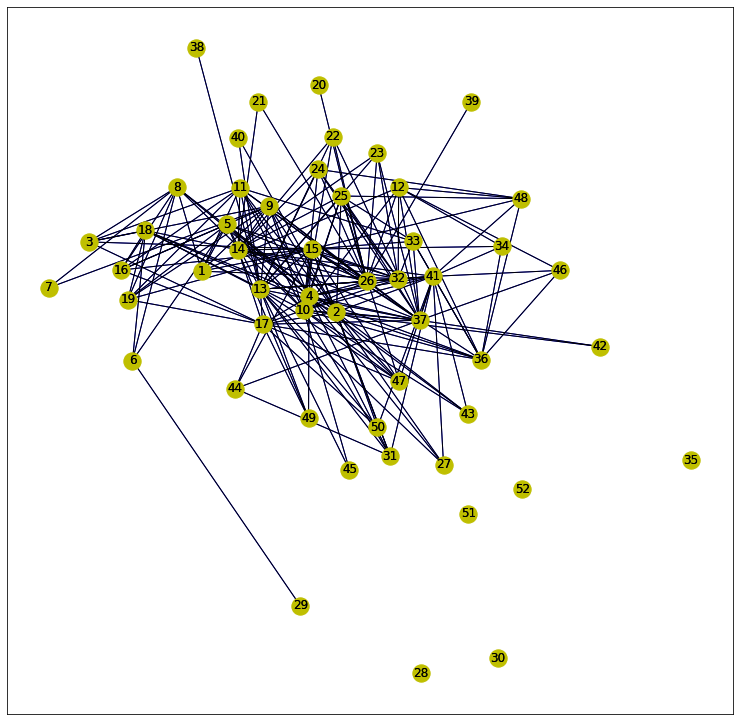

In [15]:
G2=G.copy()
# find the communities
communities = sorted(nxcom.greedy_modularity_communities(G2), key=len, reverse=True)
#Count the communities
print(f'The dataset has {len(communities)} communities.')

##The output of the community detection consists of sets of vertex numbers (set of sets).
#If we wish to visualize this we need to define a few utilities. 
#The methods simply assign the community number to the nodes and edges:
def set_node_communities(G, communities):
    '''Add communities to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1
        
def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0
def get_color(i, r_off=1, g_off=1, b_off=1):
        '''Assign a color to a vertex.'''
        r0, g0, b0 = 0, 0, 0
        n = 16
        low, high = 0.1, 0.9
        span = high - low
        r = low + span * (((i + r_off) * 3) % n) / (n - 1)
        g = low + span * (((i + g_off) * 5) % n) / (n - 1)
        b = low + span * (((i + b_off) * 7) % n) / (n - 1)
        return (r, g, b)
# Set node and edge communities
set_node_communities(G2, communities)
set_edge_community(G2)
node_color = [get_color(G2.nodes[v]['community']) for v in G2.nodes]
# Set community color for edges between members of the same community (internal) and 
# intra-community edges (external)
external = [(v, w) for v, w in G2.edges if G2.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G2.edges if G2.edges[v, w]['community'] > 0]
internal_color = ['black' for e in internal]

## A little plot now gives a better idea of how the karate club communities are:

pos1=nx.spring_layout(G2)
plt.figure(figsize=(13,13))

# Draw external edges

nx.draw_networkx(G2, pos = pos1, node_size =0, edgelist=external, edge_color="b")

# Draw nodes and internal edges

nx.draw_networkx(G2, pos = pos1, node_color = 'y', edgelist=external, edge_color=internal_color)





plt.show()

## Girvan-Newman and the Greedy algorithms: Comparing the best partition according to modularity for both methods.

In [16]:
G3=G.copy()
'''for Girvan_newman algorithms for partition'''
communities = next(nxcom.girvan_newman(G))
print(f'Girvan_newman algorithms Detected  {len(communities)} communities')

print('______________________________While_____________________________________________')

''' for Greedy algorithms for partition'''
communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)
print(f'Greedy algorithms Detected  {len(communities)} communities.')




Girvan_newman algorithms Detected  2 communities
______________________________While_____________________________________________
Greedy algorithms Detected  3 communities.


## Relate the above result to your network

# louvain partition

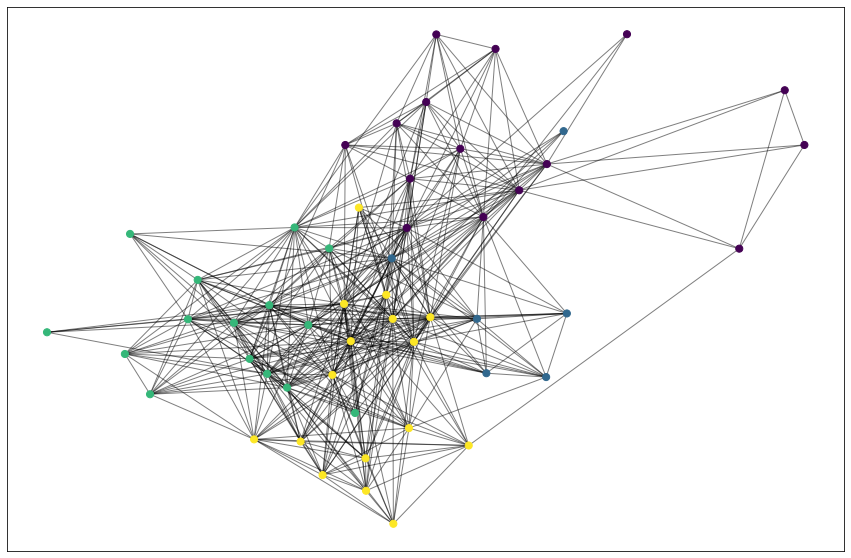

In [279]:
G=nx.from_pandas_edgelist(df,source='Source', target='Target',edge_attr='Edge_attribute')
trust= nx.get_edge_attributes(G, 'Edge_attribute')

partition = community_louvain.best_partition(G, randomize=False, random_state=210300710)
#draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=50,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

# Refferences 

In [ ]:
 @inproceedings{nr-aaai15,
      title = {The Network Data Repository with Interactive Graph Analytics and Visualization},
      author={Ryan A. Rossi and Nesreen K. Ahmed},
      booktitle = {Proceedings of the Twenty-Ninth AAAI Conference on Artificial Intelligence},
      url={http://networkrepository.com},
      year={2015}
  }

# Loading data

In [23]:
def load_data(file):
    edge_list=[]
    with open(file) as file:
        lines=file.readlines()
        for line in lines:
            edges=line.split()
            edge_list.append(edges)
    return edge_list
data=load_data("bio-diseasome.mtx")
df1=pd.DataFrame(data[2:], columns=["Gene","Lines"])

df1.head()

,Gene,Lines
0,344,1
1,287,2
2,187,3
3,476,3
4,194,4


In [28]:
file=nx.from_pandas_edgelist(df1,source='Gene', target='Lines')
# trust= nx.get_edge_attributes(data, 'Edge_attribute')

nx.info(file)

'Name: \nType: Graph\nNumber of nodes: 516\nNumber of edges: 1188\nAverage degree:   4.6047'

In [30]:
data=file.copy()
V = list(data.nodes())
N = len(V)

Gcc = sorted(nx.connected_components(data), key=len, reverse=True)
pos = nx.spring_layout(data)


# Random Failures

The approximated value for the critical failure rate is 0.1744186046511628


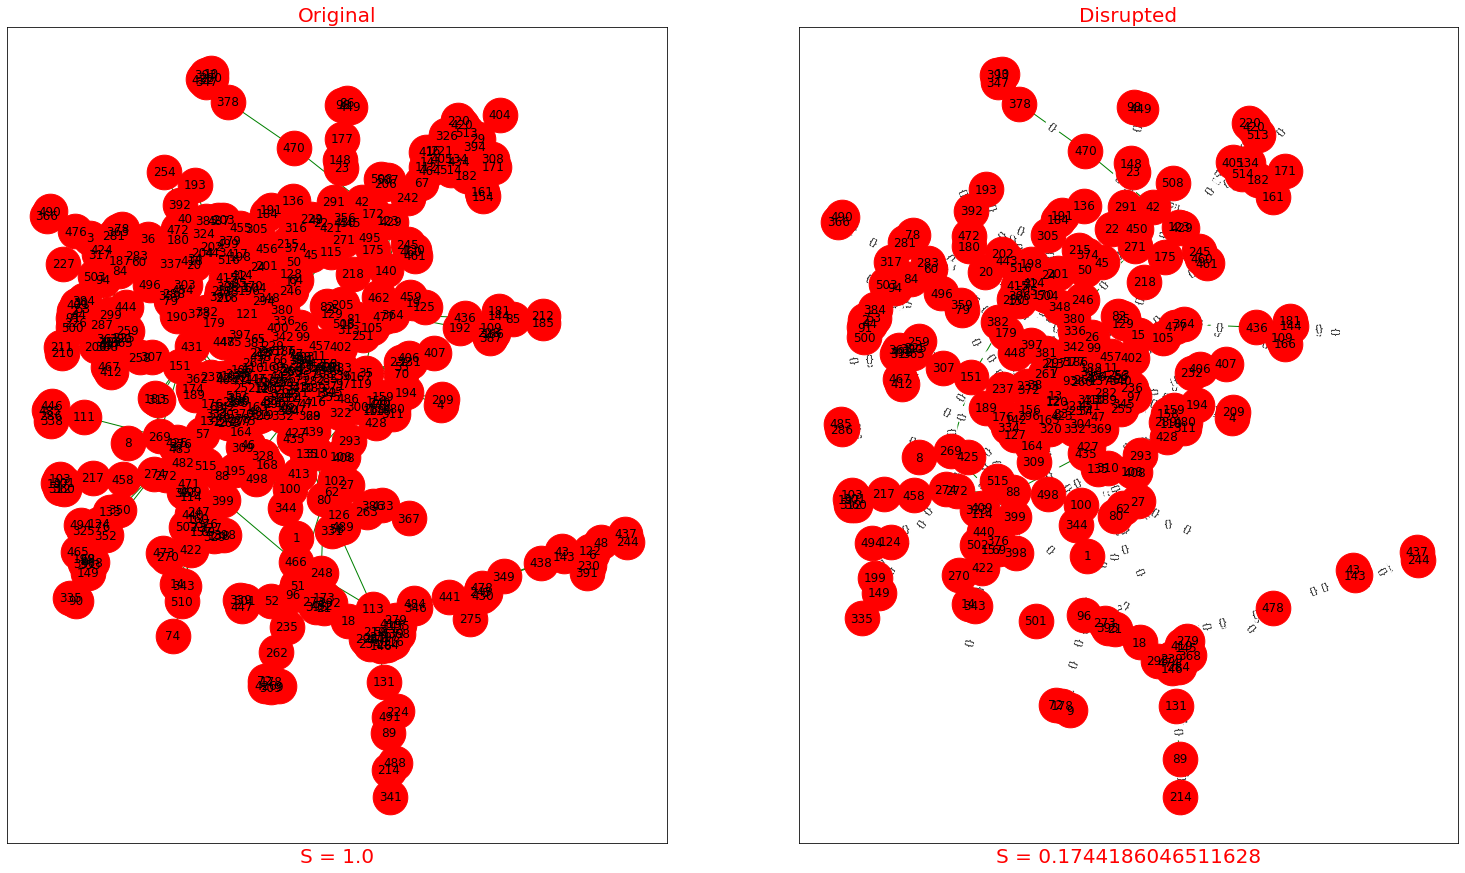

In [31]:
# Random Failures
f = 0.5
N_failed = int(N * f)

failed_nodes = rm.sample(V, N_failed)
# print(failed_nodes)

H = data.copy()
H.remove_nodes_from(failed_nodes)
Hcc = sorted(nx.connected_components(H), key=len, reverse=True)
S_H = len(Hcc[0])/len(data)

fig, axes = plt.subplots(1, 2, figsize=(26, 15))
nx.draw_networkx_edge_labels(data, pos=pos, font_size=8)
nx.draw_networkx(data, pos, node_color='r', edge_color='g',node_size=1200,arrowsize=30, ax=axes[0])

# nx.draw_networkx(data, pos, node_size=900, edgecolors='black', ax=axes[0])
axes[0].set_title('Original', color='r', fontsize=20)
axes[0].set_xlabel('S = 1.0', fontsize=20, color='r')

nx.draw_networkx_edge_labels(H, pos=pos, font_size=8)
nx.draw_networkx(H, pos, node_color='r', edge_color='g', node_size=1200, arrowsize=30, ax=axes[1])
# nx.draw_networkx(H, pos, node_size=600, edgecolors='black', ax=axes[1])
axes[1].set_title('Disrupted', color='r', fontsize=20)
axes[1].set_xlabel('S = ' + str(S_H), fontsize=20, color='r')
print(f'The approximated value for the critical failure rate is {str(S_H)}')
plt.show()

# Targeted Attack

The approximated value for the critical failure rate is 0.005813953488372093


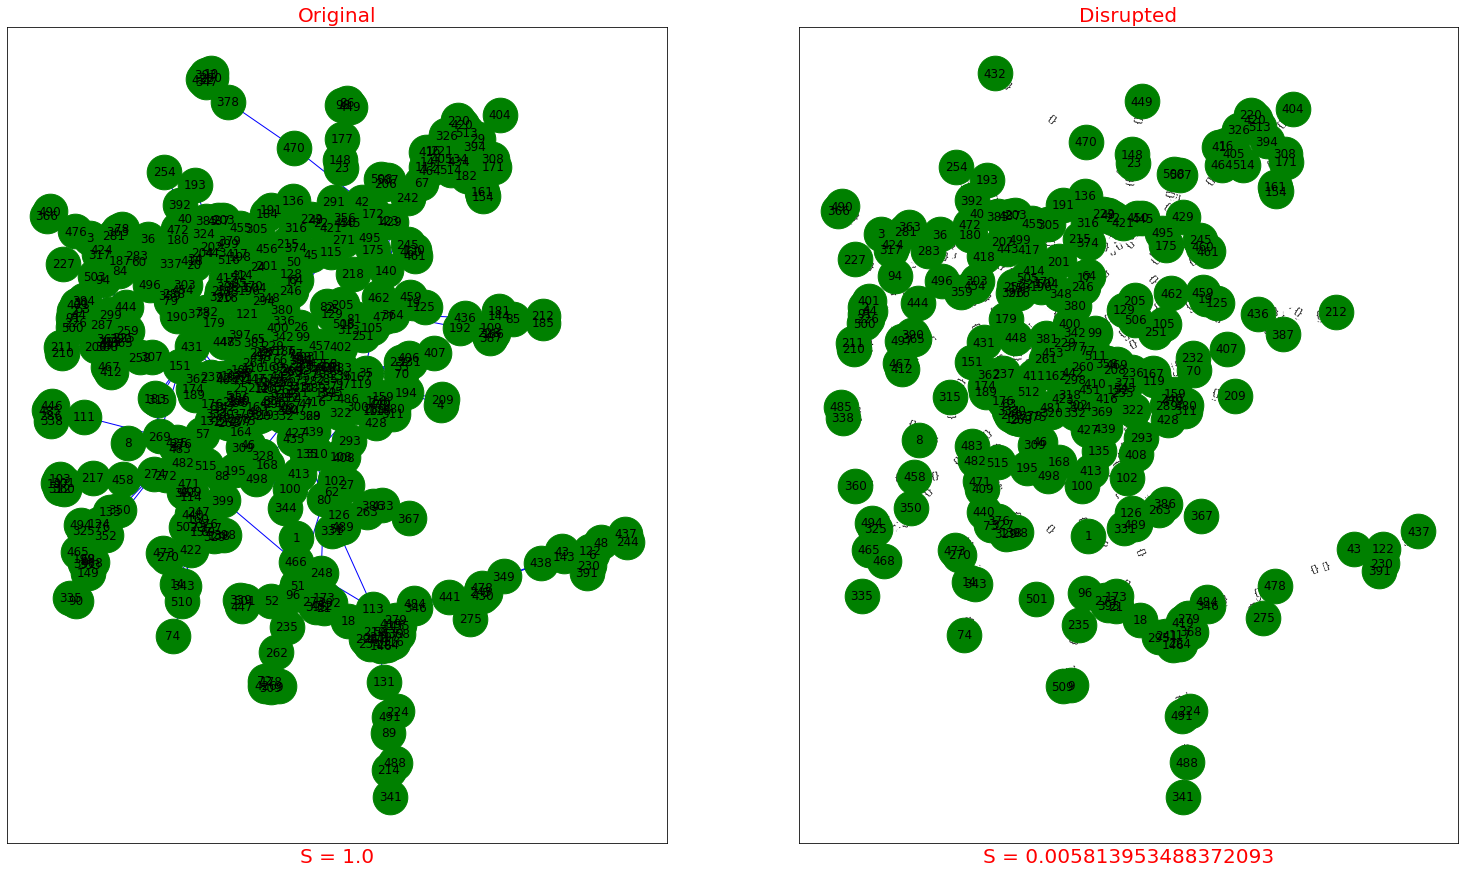

In [33]:
b = 0.5
No_failed = int(N * b)

H = data.copy()
for n in range(No_failed):
    degrees = dict(H.degree())
    H.remove_node(max(degrees, key=degrees.get))
    
# H.degree()
Hcc = sorted(nx.closeness_centrality(H), key=len, reverse=True)
S_H = len(Hcc[0])/len(data)

fig, axes = plt.subplots(1, 2, figsize=(26, 15))

nx.draw_networkx_edge_labels(data, pos=pos, font_size=8)
nx.draw_networkx(data, pos, node_color='g', edge_color='b',node_size=1200,arrowsize=30, ax=axes[0])

# nx.draw_networkx(data, pos, node_size=600, edgecolors='black', ax=axes[0])
axes[0].set_title('Original', color='r', fontsize=20)
axes[0].set_xlabel('S = 1.0', fontsize=20, color='r')

nx.draw_networkx_edge_labels(H, pos=pos, font_size=8)
nx.draw_networkx(H, pos, node_color='g', edge_color='b', node_size=1200, arrowsize=30, ax=axes[1])
# nx.draw_networkx(H, pos, node_size=600, edgecolors='black', ax=axes[1])
axes[1].set_title('Disrupted', color='r', fontsize=20)
axes[1].set_xlabel('S = ' + str(S_H), fontsize=20, color='r')
print(f'The approximated value for the critical failure rate is {str(S_H)}')

plt.show()

# Refferences

In [ ]:
@inproceedings{nr,
     title={The Network Data Repository with Interactive Graph Analytics and Visualization},
     author={Ryan A. Rossi and Nesreen K. Ahmed},
     booktitle={AAAI},
     url={https://networkrepository.com},
     year={2015}
}